In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=2021)

In [70]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [71]:
df['target'] = wine.target# 실제 target class
df['cluster'] = kmeans.labels_ # Clustering 결과 도출된 class
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463,0.671083
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393,0.658740
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151,0.732458
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372,0.620472
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831,0.544379


In [72]:
clustering_result = df.groupby(['target','cluster']).count()
clustering_result.head()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             46          46   46                 46         46   
       1             13          13   13                 13         13   
1      0              1           1    1                  1          1   
       1             20          20   20                 20         20   
       2             50          50   50                 50         50   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   46          46                    46   
       1                   13          13                    13   
1      0                    1           1                     1   
       1                   20          20                    20   
       2                   50          50                    50   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     46               46   46   
       1                     13               13   13   
1      0                      1                1    1   
       1                     20               20   20   
       2                     50               50   50   

                od280/od315_of_diluted_wines  proline  pca_x  pca_y  실루엣 계수  
target cluster                                                               
0      0                                  46       46     46     46      46  
       1                                  13       13     13     13      13  
1      0                                   1        1      1      1       1  
       1                                  20       20     20     20      20  
       2                                  50       50     50     50      50

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [74]:
df['pca_x'] = wine_pca[:, 0]
df['pca_y'] = wine_pca[:, 1]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463,0.671083
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393,0.658740
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151,0.732458
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372,0.620472
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831,0.544379


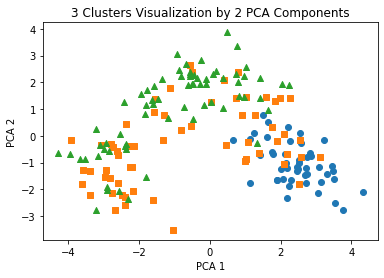

In [75]:
cls0_index = df[df.cluster == 0].index  
cls1_index = df[df.cluster == 1].index
cls2_index = df[df.cluster == 2].index
"""cls3_index = df[df.cluster == 3].index
cls4_index = df[df.cluster == 4].index
cls5_index = df[df.cluster == 5].index"""

plt.scatter(x=df.loc[cls0_index,'pca_x'], 
            y=df.loc[cls0_index,'pca_y'], marker='o')
plt.scatter(x=df.loc[cls1_index,'pca_x'], 
            y=df.loc[cls1_index,'pca_y'], marker='s')
plt.scatter(x=df.loc[cls2_index,'pca_x'], 
            y=df.loc[cls2_index,'pca_y'], marker='^')  #'D','H','x'
"""plt.scatter(x=df.loc[cls3_index,'pca_x'], 
            y=df.loc[cls3_index,'pca_y'], marker='P')
plt.scatter(x=df.loc[cls4_index,'pca_x'], 
            y=df.loc[cls4_index,'pca_y'], marker='D')
plt.scatter(x=df.loc[cls5_index,'pca_x'], 
            y=df.loc[cls5_index,'pca_y'], marker='H')"""

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [ ]:
"""markers=['s', 'o', '^']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['pca_x']
    y_axis_data = df[df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('3 Clusters Visualization with Normalization')
plt.show()"""

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(wine.data, df.cluster)
df['실루엣 계수'] = score_samples
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463,0.516178
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393,0.482042
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151,0.684513
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372,0.593218
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831,0.688007


0.5711381937868845

In [ ]:
원데이터 차원 축소후 시각화

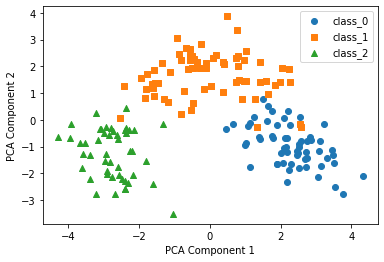

In [17]:
markers=['o', 's', '^']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['pca_x']
    y_axis_data = df[df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# --> 원 데이터가 더 잘되어있고,군집화한게 겹치는게 많다--> 군집화 전에 정규화를 해줘야한다.(마그네슘과 다른것과의 차이가 있으므로)

In [ ]:
#정규화
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#wine_std = scaler.fit_transform(df)  

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(wine_std)
df['cluster_std'] = kmeans.labels_
clustering_result = df.groupby(['target','cluster_std']).count()
clustering_result.head()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster_std                                                           
0      1                 59          59   59                 59         59   
1      0                  3           3    3                  3          3   
       1                  3           3    3                  3          3   
       2                 65          65   65                 65         65   
2      0                 48          48   48                 48         48   

                    total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster_std                                                    
0      1                       59          59                    59   
1      0                        3           3                     3   
       1                        3           3                     3   
       2                       65          65                    65   
2      0                       48          48                    48   

                    proanthocyanins  color_intensity  hue  \
target cluster_std                                          
0      1                         59               59   59   
1      0                          3                3    3   
       1                          3                3    3   
       2                         65               65   65   
2      0                         48               48   48   

                    od280/od315_of_diluted_wines  proline  cluster  pca_x  \
target cluster_std                                                          
0      1                                      59       59       59     59   
1      0                                       3        3        3      3   
       1                                       3        3        3      3   
       2                                      65       65       65     65   
2      0                                      48       48       48     48   

                    pca_y  실루엣 계수  
target cluster_std                 
0      1               59      59  
1      0                3       3  
       1                3       3  
       2               65      65  
2      0               48      48

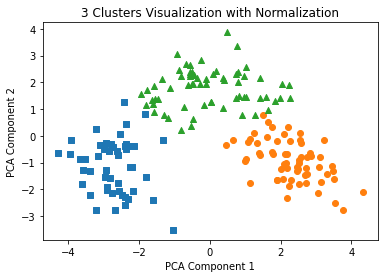

In [80]:
markers=['s', 'o', '^']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster_std == i]['pca_x']
    y_axis_data = df[df.cluster_std == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('3 Clusters Visualization with Normalization')
plt.show()

In [ ]:
#3 가지 그림 비교

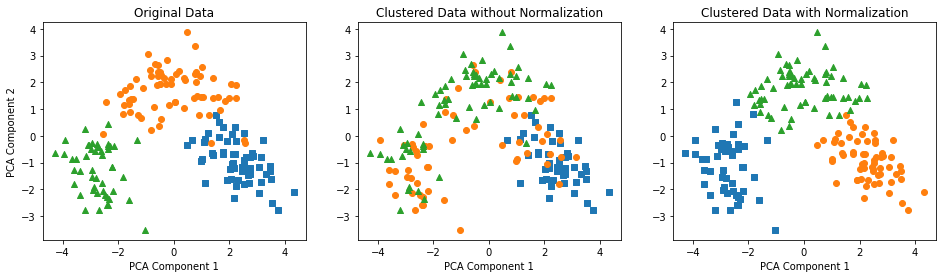

In [81]:
fig, axs = plt.subplots(figsize=(16,4), ncols=3, nrows=1)
column_dict = {
    'target':'Original Data', 
    'cluster':'Clustered Data without Normalization', 
    'cluster_std':'Clustered Data with Normalization'
}

for k, column in enumerate(column_dict.keys()):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['pca_x']
        y_axis_data = df[df[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker)

    ax.set_title(column_dict[column])
    if k == 0:
        ax.set_ylabel('PCA Component 2')
    ax.set_xlabel('PCA Component 1')

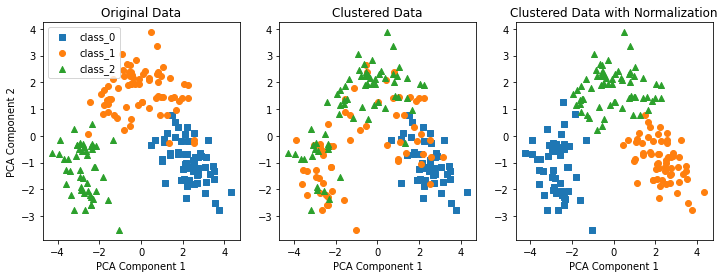

In [86]:
fig, axs = plt.subplots(figsize=(12,4), ncols=3, nrows=1)
columns = ['target', 'cluster','cluster_std']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['pca_x']
        y_axis_data = df[df[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                    label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    elif k==1:
        ax.set_title('Clustered Data')
    else :
        ax.set_title('Clustered Data with Normalization')
    ax.set_xlabel('PCA Component 1')

#실루엣

In [ ]:
"from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], wine_std)""